In [16]:
import librosa 
import numpy as np
import config.nn_config as nn_config
import matplotlib.pyplot as plt
from mpltools import style
style.use('ggplot')
plt.style.use('seaborn-darkgrid')
import glob

nn_params = nn_config.get_nn_params()

'onsetsdir' : 'np-data/onsets/metallica/'
'MIDI sequence directory' : 'plots/MIDI/metallica/'
'sequence length' : 100
'sourcedir' : 'audio/metallica/'
'midi dir' : 'midi/metallica/'
'models dir' : 'models/metallica/'
'batchsize' : 10
'ADT sequence directory' : 'plots/ADT/metallica/'
'weightsdir' : 'model-weights/metallica/'
'dev data dir' : 'np-data/dev-data/metallica/'
'model type' : 'stateful-lstm-time-distributed'
'epochs' : 3
'rendered midi dir' : 'midi/rendered-metallica/'
'drummer' : 'metallica'
'training data dir' : 'np-data/training-data/metallica/'
'slicedir' : 'audio/sliced/metallica/'
'loss directory' : 'plots/loss/metallica/'
'activationsdir' : 'np-data/activations/metallica/'


In [17]:
def placeBeatWithAudio(audio, woodblockaudio):
    y, sr1 = librosa.load(audio)
    print y.shape
    y_with_beats = np.zeros((len(y)))
    wb, sr2 = librosa.load(woodblockaudio)
    if sr1 != sr2:
        print 'mismatch of sampling rates!'
    tvect = np.zeros(len(y))
    tempo, beats = librosa.beat.beat_track(y=y, sr=sr1)
    print beats
    samples = librosa.frames_to_samples(beats)
    for i in range(len(samples)):
        tvect[samples[i]:samples[i]+len(wb)] = wb
    for i in range(len(y)):
        tvect[i] = tvect[i] + y[i]
    
    for sample in samples:
        y_with_beats[sample] = 1 
    

    return tvect, y_with_beats
    
            
    

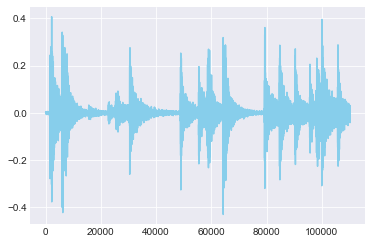

In [104]:
theaudio = 'audio/sliced-audio/tony_771751-882001.wav'


y, sr1 = librosa.load(theaudio)


plt.figure()
plt.plot(y, 'skyblue')
plt.savefig('theaudio.png', dpi=100)
plt.show()

In [99]:
def placeOnsetWithAudio(audio, woodblockaudio):
    y, sr1 = librosa.load(audio)
    
    y_with_onsets = np.zeros((len(y)))    
    
    wb, sr2 = librosa.load(woodblockaudio)
    if sr1 != sr2:
        print 'mismatch of sampling rates!'
    tvect = np.zeros(len(y))
    onset_env = librosa.onset.onset_strength(y, sr=sr1, aggregate =np.mean)
    onsets = librosa.frames_to_samples(onset_env,sr1)
    onset_frames = librosa.onset.onset_detect(onset_envelope = onset_env, sr=sr1)
    onset_samples = librosa.frames_to_samples(onset_frames)
#     for i in range(len(samples)):
#         tvect[samples[i]:samples[i]+len(wb)] = wb
#     for i in range(len(y)):
#         tvect[i] = tvect[i] + y[i]
        
    for ons in onset_samples:
        y_with_onsets[ons] = 1
    return y_with_onsets

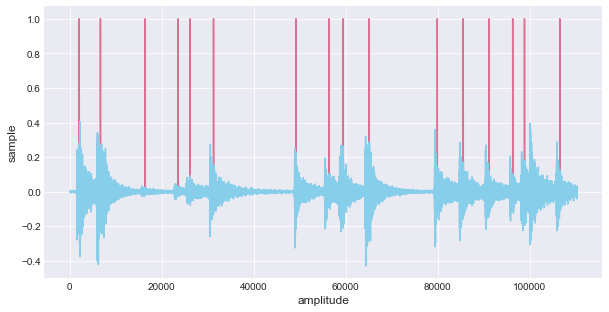

In [101]:
theaudio = 'audio/sliced-audio/tony_771751-882001.wav'
audio = librosa.load(theaudio)
onsets = placeOnsetWithAudio(theaudio, 'audio/steve-gadd/woodblock_mono.wav')

plt.figure(figsize=(10,5))
plt.plot(onsets, 'palevioletred')
plt.plot(audio[0], 'skyblue')
plt.ylabel('sample')
plt.xlabel('amplitude')
plt.savefig('plots/poster/onsetwithaudio.png', dpi=60)
plt.show()

In [62]:
theaudio = 'audio/sliced-audio/tony_992251-1102501.wav'


onsets = placeOnsetWithAudio(theaudio, 'audio/steve-gadd/woodblock_mono.wav')


[0. 0. 0. ... 0. 0. 0.]


In [68]:
theaudio = 'audio/sliced-steve-gadd/steve-gadd_15435001-15655501.wav'


mergeOnsetsAndBeats(theaudio)

array([0.        , 0.        , 0.        , 0.01412092, 0.0052278 ,
       0.        , 0.        , 0.        , 0.        , 0.02506693,
       0.2184706 , 0.05814559, 0.        , 0.        , 0.        ,
       0.00767789, 0.05042142, 0.01205223, 0.        , 0.        ,
       0.        , 0.        , 0.08973978, 0.12896705, 0.        ,
       0.        , 0.        , 0.21184783, 0.3127142 , 0.00163224,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.13203281, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.19963539, 0.03345897, 0.        ,
       0.        , 0.        , 0.        , 0.10543267, 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.42486692,
       0.26925309, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

(110251,)
[ 44  64  84 103 123 143 163 183]


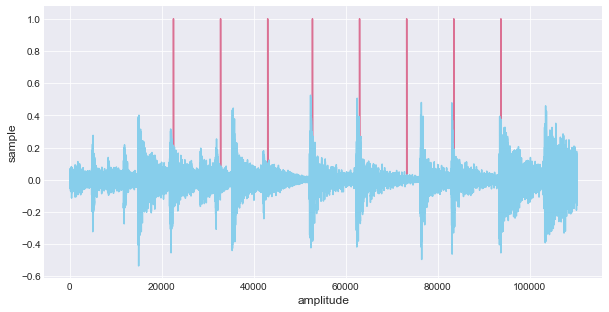

In [102]:
theaudio = 'audio/sliced-steve-gadd/steve-gadd_15435001-15655501.wav'
audio = librosa.load(theaudio)
t,y = placeBeatWithAudio(theaudio, 'audio/steve-gadd/woodblock_mono.wav')

plt.figure(figsize=(10,5))
plt.plot(y, 'palevioletred')
plt.plot(audio[0], 'skyblue')
plt.ylabel('sample')
plt.xlabel('amplitude')
plt.savefig('plots/poster/beatswithaudio.png', dpi=60)
plt.show()



In [ ]:
merge

In [25]:
y, sr = librosa.load(theaudio)

onset_env = librosa.onset.onset_strength(y, sr=sr, aggregate =np.median)
onset_env = onset_env/max(onset_env)

In [63]:
print np.array(unique_onsets)


[[ 15  16  17  28  29  41  42  47  48  59  60  67  72  73  78  79  80  92
   93  96  99 100 102 104 105 116 117 123 124 134 135 141 142 143 147 148
  153 154 160 165 166 167 173 174 176 177 178 179 180 185 186 191 192 197
  198 203 204 209 210 215]]


In [65]:
def mergeOnsetsAndBeats(audio, quantizetarget=200, plotFlag=False):
    y, sr = librosa.load(audio)

    onset_env = librosa.onset.onset_strength(y, sr=sr, aggregate =np.median)
    onset_env = onset_env/max(onset_env)

    unique_onsets = np.array(np.nonzero(onset_env))
    tempo, beats = librosa.beat.beat_track(y=y, sr=sr)

    vect = np.zeros(onset_env.shape[0])
    vect.shape

    for beat in beats:
        vect[beat] = 1

    for onset in unique_onsets[0]:
        if vect[onset] != 1:
             vect[onset] = onset_env[onset]

    quant_vect = quantize(vect, quantizetarget, keepAmplitudes=True)

    if plotFlag:
        plt.figure()
        plt.stem(quant_vect)
        plt.show()
    return quant_vect

In [99]:
def stackBeatOnsets(slicedir, quantization=200):
    bmat = np.empty((0, quantization))
    for audiofile in glob.glob(slicedir + "/*.wav"):
        bvect = mergeOnsetsAndBeats(audiofile, quantizetarget=quantization)
        bvect = np.reshape(bvect, (1, bvect.shape[0]))
        bmat = np.vstack((bmat, bvect))
    return bmat 

In [100]:
bmat = stackBeatOnsets(nn_params["slicedir"], quantization=120)

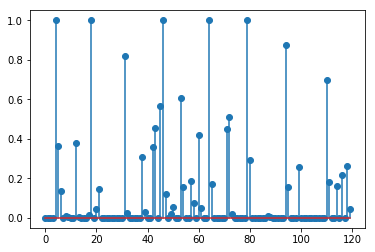

(215,)


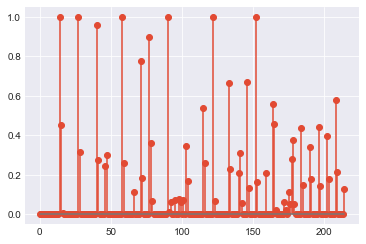

SyntaxError: 'return' outside function (<ipython-input-109-de277f88607f>, line 28)

In [109]:
y, sr = librosa.load('audio/sliced-steve-gadd/steve-gadd_18301501-18522001.wav')

onset_env = librosa.onset.onset_strength(y, sr=sr, aggregate =np.median)
onset_env = onset_env/max(onset_env)

unique_onsets = np.array(np.nonzero(onset_env))
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)

vect = np.zeros(onset_env.shape[0])
vect.shape

for beat in beats:
    vect[beat] = 1

plotFlag = True
    
for onset in unique_onsets[0]:
    if vect[onset] != 1:
         vect[onset] = onset_env[onset]

quant_vect = quantize(vect, 215, keepAmplitudes=True)
print quant_vect.shape

if plotFlag:
    plt.figure()
    plt.stem(quant_vect)
    plt.show()
return quant_vect


In [75]:
import getADT.quantize

ImportError: No module named getADT.quantize

In [67]:
def quantize(notesarray, targetlen, keepAmplitudes=True):
    # function to quantize sequences to desired length 
    # keepAmplitudes = True # retain original amplitudes 
    len_source = notesarray.shape[0] # 
    posarr = np.nonzero(notesarray)
    #print 'source array shape', notesarray.shape
    #print 'want to quantize to %r length' %(targetlen)
    
    tvect = np.zeros(targetlen) # vector to hold target notes array
    bins = np.linspace(0, len_source - 1, targetlen)
    
    idx = np.digitize(posarr, bins)
    if keepAmplitudes:
        tvect[idx-1] = notesarray[posarr]
    else:
        tvect[idx-1] = 1 
    return tvect

In [77]:
tv = quantize(vect, 200, keepAmplitudes=True)

In [78]:
tv.shape

(200,)

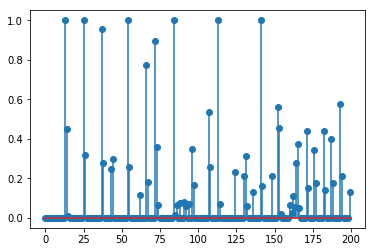

In [79]:
plt.figure()
plt.stem(tv)
plt.show()